In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from treatment import get_treated_data

In [5]:
X_train, X_test, y_train, y_test = get_treated_data()

In [6]:
mlp_model = MLPClassifier(max_iter=200)
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [7]:
y_pred = mlp_model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.935025817555938


In [9]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1829
           1       0.78      0.96      0.86       495

    accuracy                           0.94      2324
   macro avg       0.89      0.94      0.91      2324
weighted avg       0.95      0.94      0.94      2324



In [10]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

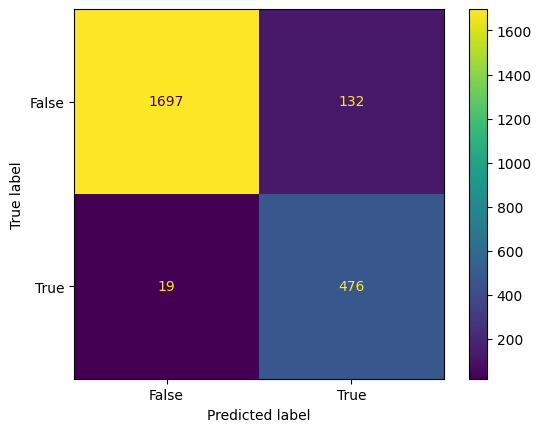

In [11]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [12]:
#Implementação do Grid Search

In [13]:
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['logistic', 'relu', 'Tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

In [14]:
grid_search = GridSearchCV(mlp_model, param_grid, refit = True, verbose = 3) 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   7.7s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   5.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   3.5s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   2.9s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   5.1s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.933 total time=  56.7s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.934 total time=  52.4s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.933 total time=  48.2s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.938 total time=  57.4s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.943 total time=  51.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.769 total time=   8.5s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.769 total time=  19.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.769 total time=  10.4s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.769 total time=  39.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=sgd;, score=0.769 total time=   5.5s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.932 total time=  56.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.933 total time=  36.6s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.937 total time=  44.6s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.936 total time=  54.1s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.944 total time=  57.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  17.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  16.4s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  15.7s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  18.8s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  17.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.939 total time=  43.9s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.945 total time=  44.8s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.769 total time=   2.5s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.769 total time=   2.6s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.769 total time=   3.9s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.769 total time=   5.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.769 total tim

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.935 total time= 1.2min
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.941 total time= 1.2min
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.769 total time=  37.7s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.769 total time=  13.4s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.769 total time=  22.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.769 total time=   7.6s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.769 total time=  

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.937 total time= 1.0min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.930 total time= 1.3min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.942 total time= 1.2min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.934 total time= 1.1min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.941 total time= 1.2min
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  15.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  20.3s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  18.8s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  24.4s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  17.1s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.939 total time=  53.5s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.934 total time= 1.0min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.941 total time= 1.1min
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.936 total time=  55.8s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.941 total time= 1.2min
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   5.1s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   2.5s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   2.4s
[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 to

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.947 total time= 1.2min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.938 total time= 1.2min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.946 total time= 1.1min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.954 total time= 1.2min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.947 total time= 1.2min
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.769 total time=   5.4s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.769 total time=   6.5s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.769 total time=   4.9s
[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.769 total time=   3.0s
[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.769 total time=   4.5s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.946 total time=  56.0s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.938 total time= 1.1min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.946 total time= 1.3min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.955 total time= 1.0min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=adam;, score=0.947 total time= 1.1min
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  14.7s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  20.0s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  24.2s
[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  21.4s
[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  15.1s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.948 total time= 1.1min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.938 total time=  45.2s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.946 total time= 1.2min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.954 total time= 1.2min


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.946 total time= 1.1min
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   3.5s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.930 total time=  29.6s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   5.8s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.952 total time=  41.5s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   4.9s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.937 total time=  13.6s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.927 total time=  19.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.939 total time=  16.8s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.935 total time=  17.4s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.945

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.925 total time=  40.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=invscaling, solver=adam;, score=0.945 total time=  12.2s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.940 total time=  35.9s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.932 total time=  43.6s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  15.9s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.769 total time=  17.1s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.940 total time=  40.9s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.935 total time=  23.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.924 total time=  27.4s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.939 total time=  19.6s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.936 total time=  17.9s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.939 total time=  21.3s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.817 total time=  48.7s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.835 total time=  48.8s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.824 total time=  33.8s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.834 total time=  32.6s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.860 total time=  35.4s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.941 total time=  23.8s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.933 total time=  33.3s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.942 total time=  27.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.932 total time=  28.5s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.946 total time=  31.8s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.769 total time=   5.1s
[CV 2/5] END activation=rel

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.866 total time=  35.1s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.822 total time=  32.4s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.808 total time=  33.6s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.864 total time=  35.1s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.858 total time=  30.3s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.933 total time=  27.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.934 total time=  25.5s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.940 total time=  30.5s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.929 total time=  26.3s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.947 total time=  24.2s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   3.2s
[CV 2/5] END activation=

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.951 total time=  27.5s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.769 total time=   3.4s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.930 total time=  15.7s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.930 total time=  19.6s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.935 total time=  12.5s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.927 total time=  16.6s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.937 total time=  

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.817 total time=  32.4s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.819 total time=  40.4s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.837 total time=  37.8s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.857 total time=  34.9s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.828 total time=  31.7s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.940 total time=  39.6s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.936 total time=  42.0s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.941 total time=  44.7s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.948 total time=  37.6s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.943 total time=  34.4s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=invscaling, solver=sgd;, score=0.231 total time=  11.6s
[CV 2/5] END activation=relu, alpha=0.05,

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.839 total time=  29.2s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.827 total time=  34.6s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.841 total time=  29.4s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.830 total time=  26.4s


/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.837 total time=  26.1s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.936 total time=  29.5s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.931 total time=  33.9s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.941 total time=  37.3s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.940 total time=  29.6s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.943 total time=  24.0s
[CV 1/5] END activation=Tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=nan total time=   0.0s
[CV 2/5] END activation=Tanh, alpha=

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu', 'Tanh'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=3)

In [15]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [16]:
best_mlp_model = grid_search.best_estimator_

In [17]:
best_mlp_model.fit(X_train, y_train)

/home/rafael/Dev/IA-SpamCheck/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=0.05, hidden_layer_sizes=(20,))

In [18]:
grid_pred = best_mlp_model.predict(X_test)

In [19]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9475043029259896


In [20]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1829
           1       0.95      0.80      0.87       495

    accuracy                           0.95      2324
   macro avg       0.95      0.89      0.92      2324
weighted avg       0.95      0.95      0.95      2324



In [21]:
grid_confusion_matrix = confusion_matrix(y_test, grid_pred)

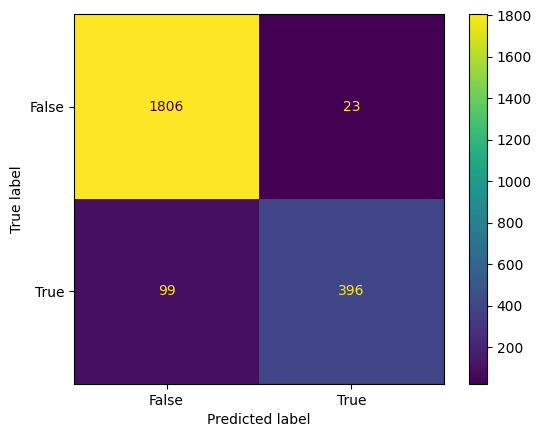

In [22]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()